In [ ]:
!pip3 install transformers requests beautifulsoup4
!pip3 install torch torchvision torchaudio

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [111]:
!pip3 install -U matplotlib
!pip3 install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np 
from transformers import AutoTokenizer, AutoModelForSequenceClassification 
import torch 
import requests #used to grab data and webpage from website
from bs4 import BeautifulSoup 
import re 
import matplotlib as plt

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
#Collecting all of the reviews
url = 'https://www.yelp.com/brands/uber'
req = requests.get(url)
#if req.status_code == 200:  
bs = BeautifulSoup(req.text, 'html.parser')
p_reviews = bs.find_all('p', {'class': 'y-css-1u2ok91'})
span_reviews = bs.find_all('span', {'class': 'y-css-h9c2fl'})
all_reviews = [review.text.strip() for review in span_reviews + p_reviews if len(review.text.strip().split()) >= 4]

#Removing unwanted data from web scraping
clean_reviews = []
for review in all_reviews:
    review = review.replace('...', '').strip()
    review = review.replace('\n', '').strip()
    review = review.replace('\\', '').strip()
    if len(review.split()) >= 4: #Removes the city and state from the reviews(not necessary)
        clean_reviews.append(review)
clean_reviews

["DON'T Use UBER RENTAL CAR SERVICE. I booked my 1st Uber Rental Car with Valet service on August 18, 2024 in Englewood, CO. Unfortunately, NO UBER driver came to pick me up at the Hotel, or deliver my rental car, as I had reserved.  I searched for 20-30 minutes",
 "I have to add to this review. Not only did Ubereats not respond to my complaint, but they have flagged the credit card that was used for this transaction and it won't let me buy from them using that card anymore.    I don't know who is running",
 "I'd give zero if I could. I have ordered from Uber Eats numerous times. My order has always gone to the address that I had listed. But for some reason Uber had glitched. I placed an order and apparently my order was in route to a home I moved out",
 'a exceptional performance every time I use them. I wish the service was a little more efficient with a fast response time. all the cars have been clean and well maintained. drivers are almost always friendly and respectful.',
 'worst 

In [76]:
#Putting reviews in data frame
myDF = pd.DataFrame(np.array(clean_reviews), columns=['review'])
myDF.head()

,review
0,DON'T Use UBER RENTAL CAR SERVICE. I booked my...
1,I have to add to this review. Not only did Ube...
2,I'd give zero if I could. I have ordered from ...
3,a exceptional performance every time I use the...
4,worst driving app service I have ever used the...


In [ ]:
#Scores each review
def get_Sentiment_Score(review):
    tokens = tokenizer.encode(review, return_tensors='pt') #encodes sentiment
    res = model(tokens)
    return int(torch.argmax(res.logits))+1 #0-indexed so add 1

In [100]:
myDF['sentiment'] = myDF['review'].apply(lambda x: get_Sentiment_Score(x[:512])) #max 512 tokens can be used with this NLP pipeline

In [101]:
myDF

,review,sentiment
0,DON'T Use UBER RENTAL CAR SERVICE. I booked my...,1
1,I have to add to this review. Not only did Ube...,1
2,I'd give zero if I could. I have ordered from ...,1
3,a exceptional performance every time I use the...,5
4,worst driving app service I have ever used the...,1
5,I had a teenager take a ride today. He left hi...,2
6,I would give this a zero if I could. I ordered...,1
7,I used Uber for the first time and it is a del...,5
8,Uber is a FRAUDULENT company! They will CHEAT ...,1
9,Uber is a FRAUDULENT company! Uber charge you ...,1


/var/folders/dv/02z541lj1qj3zq1srgf0lvmh0000gn/T/ipykernel_91765/1720529293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=myDF, palette='viridis')


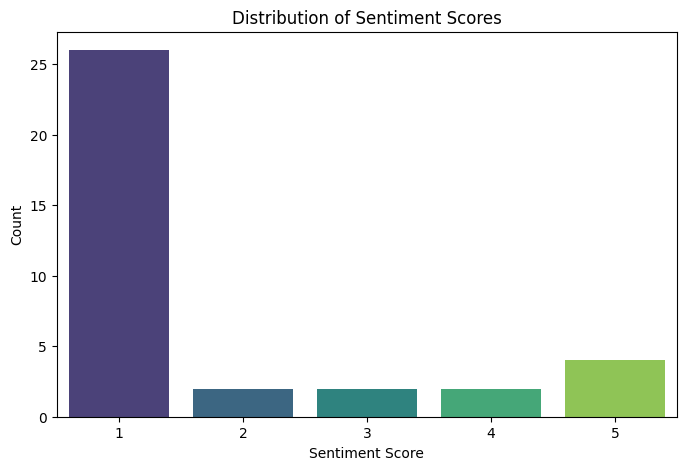

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=myDF, palette='viridis')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()